In [62]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
#cargamos los datos de entrada
data = pd.read_csv("./articulos_ml.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

(161, 8)

In [64]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [65]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


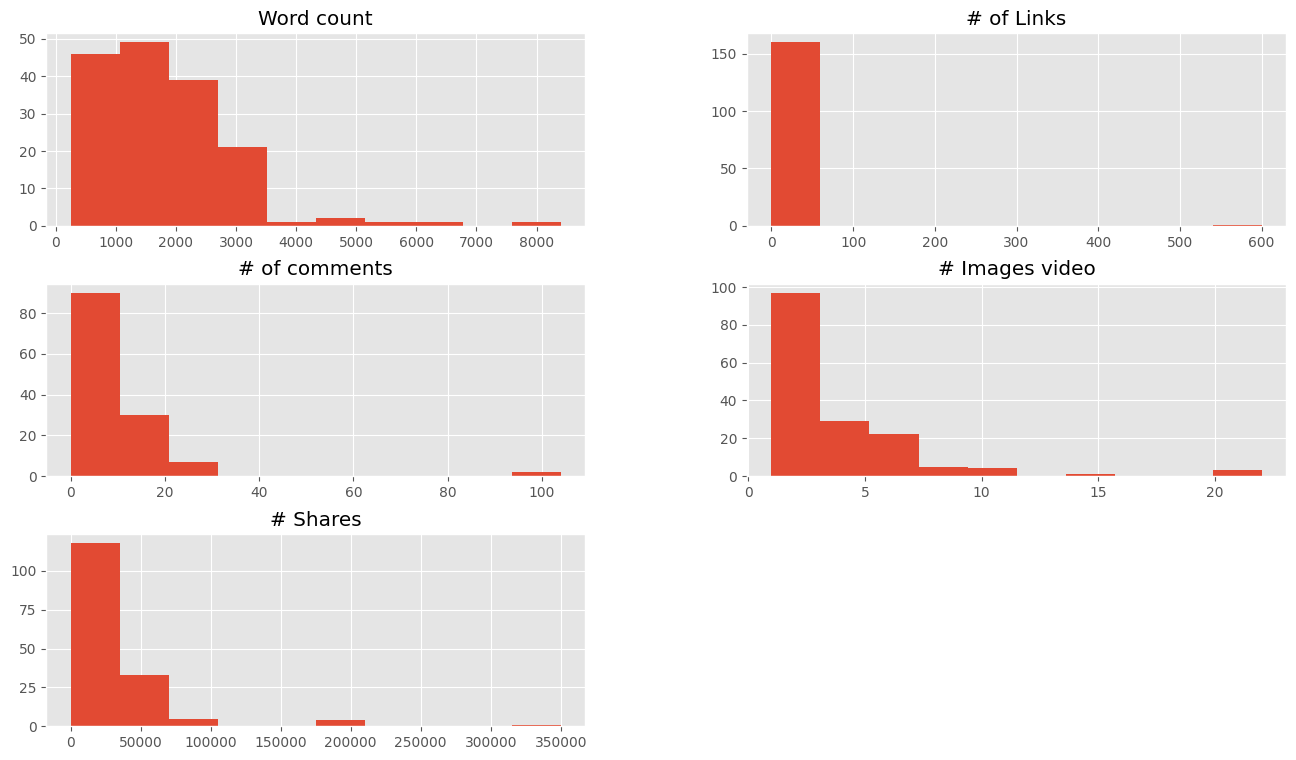

In [66]:
data.drop(['Title', 'url', 'Elapsed days'], axis=1).hist()
plt.show()

In [67]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
colores=['orange','blue']
tamanios=[30,60]
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
         asignar.append(colores[1])

In [68]:
suma = (filtered_data["# of Links"] +
filtered_data['# of comments'].fillna(0) +
filtered_data['# Images video'])
# Creamos el nuevo DataFrame con dos características
dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
# Convertimos a arrays de NumPy para el entrenamiento
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
# Entrenamos el modelo con 2 dimensiones
regr2.fit(XY_train, z_train)
# Hacemos las predicciones
z_pred = regr2.predict(XY_train)
# Mostramos los coeficientes y evaluamos el modelo
print('Coefficients: \n', regr2.coef_)
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
print('Variance score: %.2f' % r2_score(z_train, z_pred))


Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


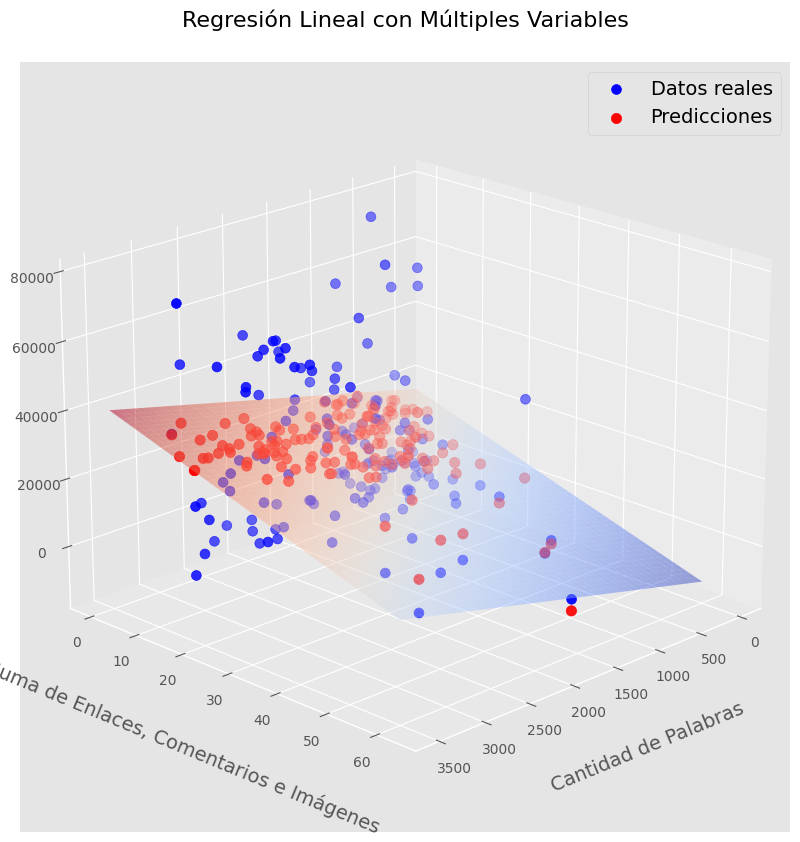

In [69]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(np.linspace(0, 3500, num=50), np.linspace(0, 60, num=50))
nuevoX = regr2.coef_[0] * xx
nuevoY = regr2.coef_[1] * yy
z = nuevoX + nuevoY + regr2.intercept_

ax.plot_surface(xx, yy, z, alpha=0.5, cmap='coolwarm')

ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue', s=50, label="Datos reales")

z_pred = regr2.predict(XY_train)
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red', s=55, label="Predicciones")

ax.view_init(elev=20, azim=45)
ax.grid(True)

ax.set_xlabel('Cantidad de Palabras', fontsize=14, labelpad=20)
ax.set_ylabel('Suma de Enlaces, Comentarios e Imágenes', fontsize=14, labelpad=20)
ax.set_zlabel('Compartido en Redes', fontsize=14, labelpad=20)
ax.set_title('Regresión Lineal con Múltiples Variables', fontsize=16, pad=25)

ax.legend(fontsize=14)
plt.show()
